<a href="https://colab.research.google.com/github/Rakshithabmsce/UserReady/blob/main/load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [2]:

df = pd.read_csv('power_system_load_large.csv')
df.head()


,Date,Usage_kWh,Lagging Current,Leading Current,CO2,NSM,Load Type
0,2019-01-01,1915,292,275,445,34657,Medium_Load
1,2019-02-01,1354,225,92,495,36269,Medium_Load
2,2019-03-01,2358,522,111,494,36276,Maximum_Load
3,2019-04-01,1380,418,268,461,34647,Medium_Load
4,2019-05-01,1883,464,267,499,34625,Medium_Load


Load the Dataset

In [3]:

df['Date'] = pd.to_datetime(df['Date'])
print(df.isnull().sum())
label_encoder = LabelEncoder()
df['Load_Type_Encoded'] = label_encoder.fit_transform(df['Load Type'])
df.drop('Load Type', axis=1, inplace=True)


Date               0
Usage_kWh          0
Lagging Current    0
Leading Current    0
CO2                0
NSM                0
Load Type          0
dtype: int64


 Data Preprocessing,and checking for null values


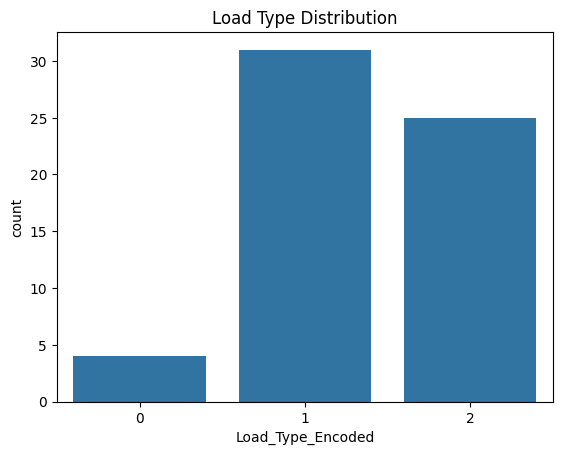

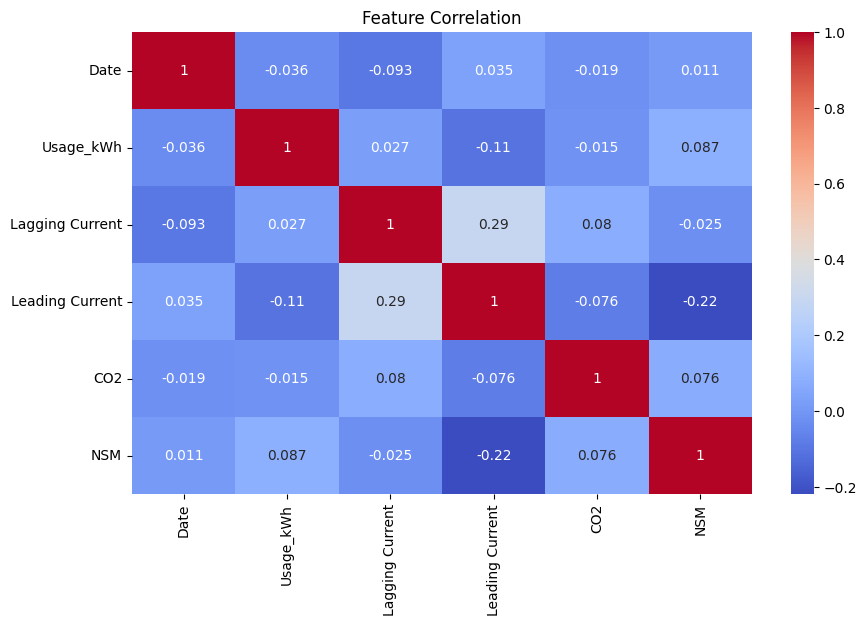

In [4]:
sns.countplot(x='Load_Type_Encoded', data=df)
plt.title("Load Type Distribution")
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Load_Type_Encoded', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [5]:

df['Month'] = df['Date'].dt.month
df = df.drop('Date', axis=1)
X = df.drop('Load_Type_Encoded', axis=1)
y = df['Load_Type_Encoded']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
train_size = int(len(df) * 0.9)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Train-Test Split

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.58      0.67      0.62         6
weighted avg       0.71      0.83      0.76         6

Confusion Matrix:
 [[0 0 1]
 [0 2 0]
 [0 0 3]]


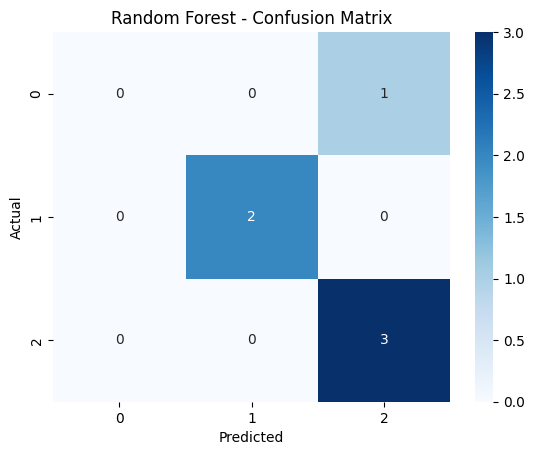

In [7]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()


 Random Forest Model

In [8]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.58      0.67      0.62         6
weighted avg       0.71      0.83      0.76         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.50      0.67         2
           2       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.92      0.83      0.84         6
weighted avg       0.88      0.83      0.82         6


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.17      0.33      0.22         6
weighted avg       0.25      0.50      0.33         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


comparing with other models

In [9]:
df.head()

,Usage_kWh,Lagging Current,Leading Current,CO2,NSM,Load_Type_Encoded,Month
0,1915,292,275,445,34657,2,1
1,1354,225,92,495,36269,2,2
2,2358,522,111,494,36276,1,3
3,1380,418,268,461,34647,2,4
4,1883,464,267,499,34625,2,5


 0 (Light), 1 (Medium), 2 (Maximum)

<Axes: xlabel='Load_Type_Encoded', ylabel='count'>

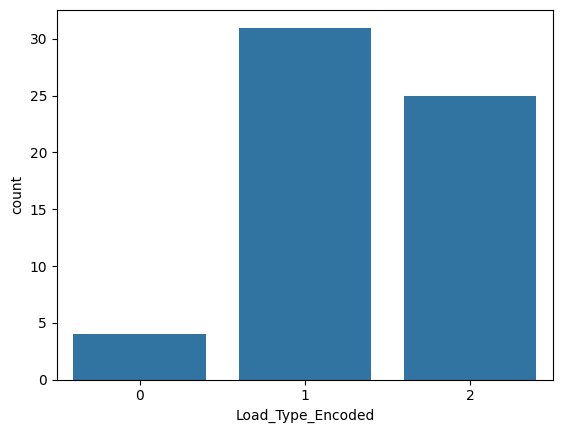

In [11]:
sns.countplot(x='Load_Type_Encoded', data=df)


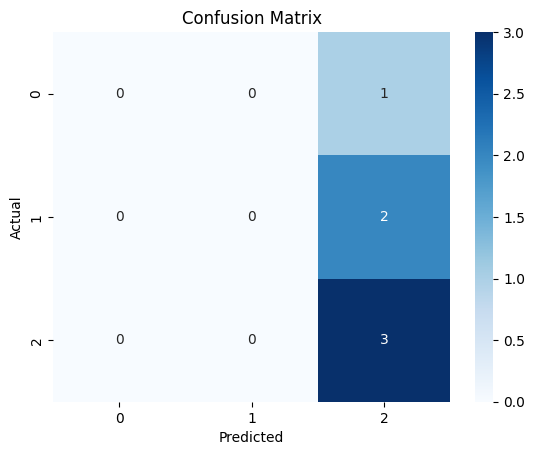

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
